# Part 3  - Explore the Location Data
The dataset contains the 100 most populated metro areas along with the ten most frequently occuring venue categoies from Foursquare.

<table style="width:100%">
    <tr>
        <td style="text-align: left">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Final%20Project%20-%20Get%20FourSquare%20Data.ipynb">&larr; Part 2</a>
            </h2>
        </td>
        <td style="text-align: right">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Cluster%20Metro%20Areas.ipynb">Part 4 &rarr;</a>
            </h2>
        </td>
    </tr>
</table>

In [1]:
#import libraries
import requests
import numpy as np
import pandas as pd
import ibm_boto3
import io

In [2]:
# import plotting libraries
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
#Import Venue dataframe
obj = resource.Object(bucket_name=bucket, key='VenueData.json').get()
df = pd.read_json(io.BytesIO(obj['Body'].read()))
df.sort_index(inplace=True)
df.head()

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,Tokyo,Japan,Asia,35.682839,139.759455,Café,Japanese Restaurant,Italian Restaurant,Sushi Restaurant,Lounge,Garden,French Restaurant,Dessert Shop,Thai Restaurant,Steakhouse
1,Delhi,India,Asia,28.651718,77.221939,Indian Restaurant,Bar,Café,Flea Market,Lounge,Asian Restaurant,Ice Cream Shop,South Indian Restaurant,Portuguese Restaurant,Plaza
2,Mexico City,Mexico,North America,19.432601,-99.133342,Mexican Restaurant,Art Museum,Museum,Arts & Crafts Store,Bar,Ice Cream Shop,Boutique,Bakery,Restaurant,Café
3,São Paulo,Brazil,South America,-23.550651,-46.633382,Brazilian Restaurant,Japanese Restaurant,Café,Bakery,Snack Place,Bookstore,Cosmetics Shop,Asian Restaurant,Art Gallery,Chinese Restaurant
4,Lagos,Nigeria,Africa,6.455057,3.394179,Lounge,African Restaurant,Bar,Café,Shopping Mall,Pizza Place,Hotel,Art Gallery,Italian Restaurant,Market


### Which locations have fewer than 10 venue categoies retured from Foursquare?

In [5]:
#See which rows have na values
df_nan = df[df['Category 10'].isna()]
df_nan

,Metropolitan,Country,Continent,Latitude,Longitude,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
16,Tianjin,China,Asia,39.303262,117.416364,Tour Provider,Bookstore,Italian Restaurant,National Park,Park,None,None,None,None,None
26,Xi'an,China,Asia,35.000074,104.999927,Business Service,Women's Store,None,None,None,None,None,None,None,None
29,Changzhou,China,Asia,31.812986,119.969205,American Restaurant,Chinese Restaurant,Department Store,Electronics Store,History Museum,Italian Restaurant,Shopping Mall,None,None,None
32,Shantou,China,Asia,23.356377,116.677592,Chinese Restaurant,Park,Coffee Shop,Italian Restaurant,None,None,None,None,None,None
43,Zhengzhou,China,Asia,34.759188,113.652408,Shopping Mall,Chinese Restaurant,Electronics Store,German Restaurant,History Museum,Hotel,None,None,None,None
50,Bandung,Indonesia,Asia,-6.934469,107.604954,Museum,Noodle House,Park,Pet Store,Restaurant,None,None,None,None,None
56,Beijing,China,Asia,40.190632,116.412144,Chinese Restaurant,Hot Spring,Museum,Resort,Ski Area,None,None,None,None,None
60,Wenzhou,China,Asia,27.995869,120.691579,Bar,Chinese Restaurant,Coffee Shop,Hotel,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Pizza Place,Plaza,None
63,Nanchang,China,Asia,28.679270,115.888599,Grocery Store,History Museum,Lake,Movie Theater,Pub,Shopping Mall,None,None,None,None
64,Yangon,Myanmar,Asia,17.059434,96.113390,Asian Restaurant,Breakfast Spot,Restaurant,River,None,None,None,None,None,None


### How many of the top 100 metro areas are in each continent?

In [6]:
#Count metro areas by Continent
df1 = pd.DataFrame({'Continent':df.Continent, 'Count':df.Metropolitan})
df1 = df1.groupby(['Continent']).count().sort_values(by=['Count'], ascending=False)

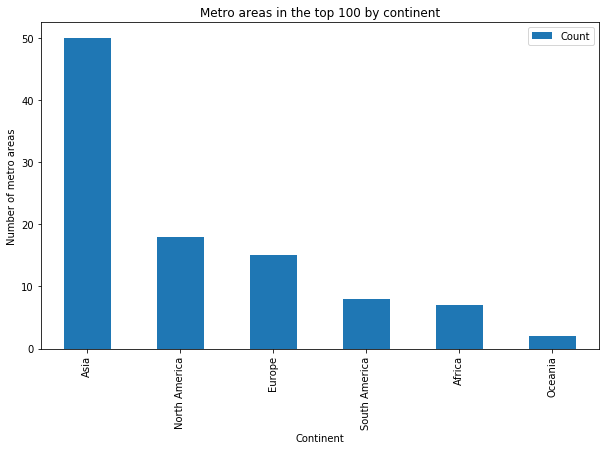

In [7]:
df1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Continent') # add to x-label to the plot
plt.ylabel('Number of metro areas') # add y-label to the plot
plt.title('Metro areas in the top 100 by continent') # add title to the plot
plt.show()

### How many of the top metro areas are in each country?
Only those countries with more than 1 metro area are included in the plot

In [8]:
#Count metro areas by country
df2 = pd.DataFrame({'Country':df.Country, 'Count':df.Metropolitan})
df2 = df2.groupby(['Country']).count().sort_values(by=['Count'], ascending=False)
df2

,Count
Country,
China,21
United States,14
India,9
Germany,6
Mexico,3
Brazil,3
Indonesia,3
Japan,3
South Korea,2


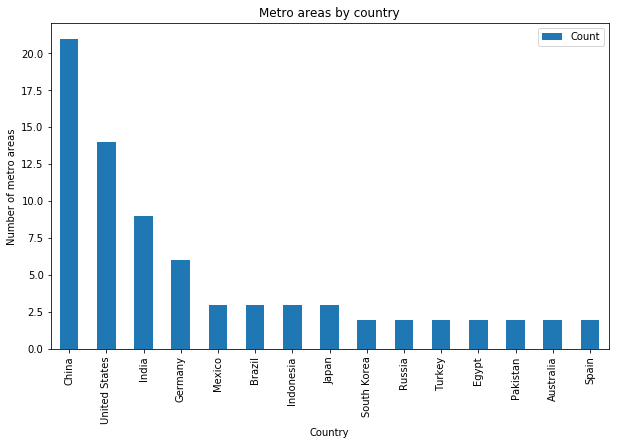

In [9]:
df2[df2['Count']>1].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Country') # add to x-label to the plot
plt.ylabel('Number of metro areas') # add y-label to the plot
plt.title('Metro areas by country') # add title to the plot
plt.show()

### Category 1 contains the venue category that was returned most often for each metro area
### Which venue types occured most often for Category 1?
Only categories that occured at least twice are shown.

In [10]:
#Count #1 top venue category
df3 = pd.DataFrame({'Top Venue':df['Category 1'], 'Count':df.Metropolitan})
df3 = df3.groupby(['Top Venue']).count().sort_values(by=['Count'], ascending=False)
df3 = df3[df3['Count']>1]
df3

,Count
Top Venue,
Café,14
Coffee Shop,10
Shopping Mall,9
Indian Restaurant,8
Bar,7
Chinese Restaurant,7
Mexican Restaurant,3
Park,3
Restaurant,2


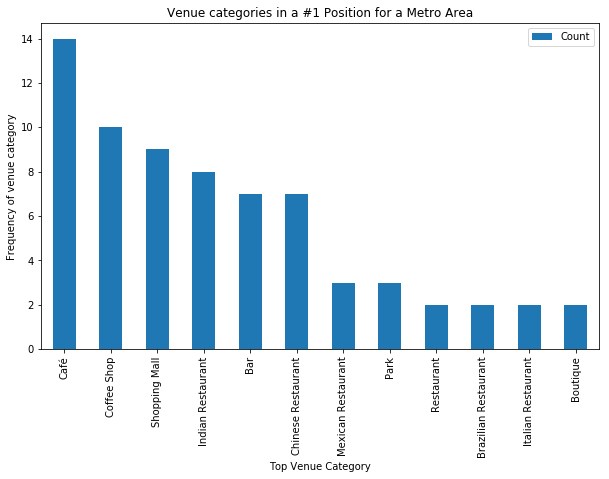

In [11]:
df3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Top Venue Category') # add to x-label to the plot
plt.ylabel('Frequency of venue category') # add y-label to the plot
plt.title('Venue categories in a #1 Position for a Metro Area') # add title to the plot
plt.show()

### In how many locations does each venue category occur?
Dataset is restricted to the top 10 categories for each location.
Only those that occured in 10 or more locations are shown.

In [12]:
#Count how many times each venue category occurs in the dataframe
df4 = pd.DataFrame()
df_cols = df.iloc[:,range(5,15)]
#df_cols = df_cols.reset_index(drop=True)
#Loop through category columns
for col, content in df_cols.items():
    df5 = pd.DataFrame({'Venue':df_cols[col], 'Count':df_cols.index})
    df5 = df5.groupby(['Venue']).count().sort_values(by=['Count'], ascending=False)
    df4 = df4.append(df5)
df4 = df4.groupby(['Venue']).sum().sort_values(by=['Count'], ascending=False)
df5 = df4[df4['Count']>9]
df5

,Count
Venue,
Café,58
Coffee Shop,56
Park,35
Italian Restaurant,31
Restaurant,29
Chinese Restaurant,27
Plaza,26
Ice Cream Shop,25
Bar,25


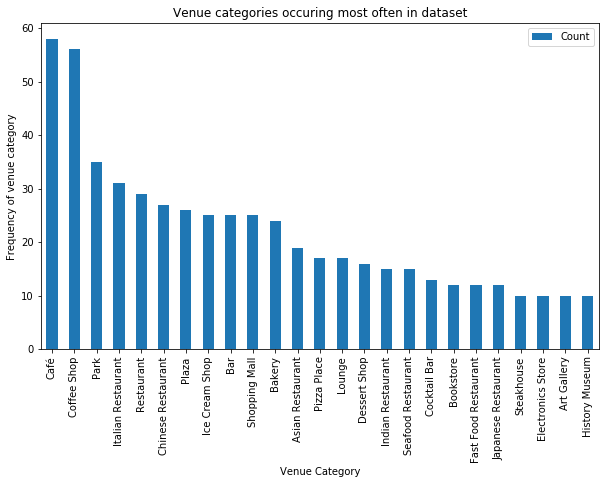

In [13]:
df5.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Frequency of venue category') # add y-label to the plot
plt.title('Venue categories occuring most often in dataset') # add title to the plot
plt.show()

### Look at how many categoies occured once, twice, three times, etc.

In [14]:
dfcc = pd.DataFrame({'Number of Occurances':df4['Count'], 'Count of venue categories':df4.iloc[:,0]})

dfcc = dfcc.groupby(dfcc['Number of Occurances']).count().sort_values(by=['Number of Occurances'])
dfcc

,Count of venue categories
Number of Occurances,
1,73
2,23
3,15
4,6
5,8
6,2
7,9
8,7
9,5


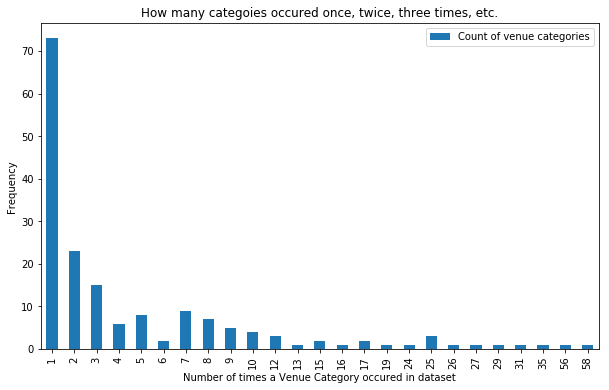

In [15]:
dfcc.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Number of times a Venue Category occured in dataset') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('How many categoies occured once, twice, three times, etc.') # add title to the plot
plt.show()

### Which categoies only occur once?
Renaming some of these may improve the model.

In [16]:
with pd.option_context('display.max_rows', None):
    display(df4[df4['Count']==1])

,Count
Venue,
Resort,1
Women's Store,1
Public Art,1
Xinjiang Restaurant,1
Wings Joint,1
Russian Restaurant,1
Whisky Bar,1
Sculpture Garden,1
Sake Bar,1


<table style="width:100%">
    <tr>
        <td style="text-align: left">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Final%20Project%20-%20Get%20FourSquare%20Data.ipynb">&larr; Part 2</a>
            </h2>
        </td>
        <td style="text-align: right">
            <h2>
                <a href="https://nbviewer.jupyter.org/github/KathrynDH/IBMCapstoneFinalProject/blob/master/Cluster%20Metro%20Areas.ipynb">Part 4 &rarr;</a>
            </h2>
        </td>
    </tr>
</table>